In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
## Now we import train_test_split
from sklearn.model_selection import train_test_split
# import Lasso
from sklearn.linear_model import Ridge, Lasso
## import KFold
from sklearn.model_selection import KFold

## import mean_squared_error
from sklearn.metrics import mean_squared_error 


df = pd.read_csv('D:\SoB\MainSoB.csv',sep=",",header=0, index_col=False)
df = df.drop(df.columns[0], axis=1)
Territories_To_Drop = [2, 11, 15, 72, 78]
Commodities_list=[41,11,81,51,88,91,21]
df = df[~df['State.Code'].isin(Territories_To_Drop)]
df = df[df['Commodity.Code'].isin(Commodities_list)]
df['Liability'] = pd.to_numeric(df['Liability'])
df=df[df['Liability']!=0]
#Drops rows with 0 liability... somehow
def add_leading_zero(column):
    max_length = df[column].astype(str).str.len().max()
    return df[column].astype(str).apply( lambda string: string.zfill(max_length) if len(string) < max_length else string)
df['FIPS']=add_leading_zero('State.Code')+add_leading_zero('County.Code')
df['ID']=df['Year'].astype(str)+'_'+df['FIPS']
main=df.copy()

In [2]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1729610 entries, 13 to 3396780
Data columns (total 30 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Year                      int64  
 1   State.Code                int64  
 2   State.Abbr                object 
 3   County.Code               int64  
 4   County.Name               object 
 5   Commodity.Code            int64  
 6   Commodity.Name            object 
 7   Insurance.Plan.Code       int64  
 8   Insurance.Plan.Abbr       object 
 9   Coverage.Category         object 
 10  Delivery.Type             object 
 11  Coverage.Level            float64
 12  Policies.Sold.Count       int64  
 13  Policies.Earning.Premium  int64  
 14  Policies.Indemnified      int64  
 15  Units.Earning.Premium     int64  
 16  Units.Indemnified         int64  
 17  Quantity.Type             object 
 18  Net.Planted.Quantity      float64
 19  Net.Endorsed.Acres        int64  
 20  Liability              

In [3]:
temp= main[['ID','Commodity.Code','Coverage.Level','Total.Premium','Indemnity.Amount','Net.Planted.Quantity','Liability']].copy()

# Filter the DataFrame for Coverage.Level = 0.5
coverage_0_5 = temp[temp['Coverage.Level'] == 0.5]
# Group by ID, Commodity.Code, and Coverage.Level = 0.5, and calculate the sums
grouped_0_5 = coverage_0_5.groupby(['ID', 'Commodity.Code', 'Coverage.Level']).sum().reset_index()
# Filter the DataFrame for Coverage.Level != 0.5
coverage_other = temp[temp['Coverage.Level'] != 0.5]
# Group by ID, Commodity.Code, and Coverage.Level != 0.5, and calculate the sums
grouped_other = coverage_other.groupby(['ID', 'Commodity.Code']).sum().reset_index()
# Concatenate the two grouped DataFrames
result = pd.concat([grouped_0_5, grouped_other])

result['Loss.Ratio'] = result['Indemnity.Amount']/result['Total.Premium']
result['Coverage.Level'] = result['Coverage.Level'].astype(str)
result['Coverage.Level'] = np.where(result['Coverage.Level'] == '0.5', 'CAT', 'BUY')
#Calculate Loss Ratio and Label Results

result['Ln_LR']=np.log(result['Loss.Ratio']+0.001)

result.head(30)

D:\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,ID,Commodity.Code,Coverage.Level,Total.Premium,Indemnity.Amount,Net.Planted.Quantity,Liability,Loss.Ratio,Ln_LR
0,1989_01001,41,CAT,14.0,0,6.0,281.0,0.000000,-6.907755
1,1989_01003,41,CAT,719.0,0,123.0,7939.0,0.000000,-6.907755
2,1989_01005,21,CAT,846.0,8507,102.0,11751.0,10.055556,2.308225
3,1989_01005,41,CAT,70.0,0,27.0,791.0,0.000000,-6.907755
4,1989_01031,41,CAT,228.0,0,121.0,2576.0,0.000000,-6.907755
5,1989_01033,21,CAT,16336.0,15277,1718.0,258543.0,0.935174,-0.065954
6,1989_01033,41,CAT,430.0,0,187.0,5752.0,0.000000,-6.907755
7,1989_01033,81,CAT,3665.0,0,796.0,31002.0,0.000000,-6.907755
8,1989_01039,21,CAT,2413.0,0,203.0,30508.0,0.000000,-6.907755
9,1989_01039,41,CAT,164.0,0,40.0,1924.0,0.000000,-6.907755


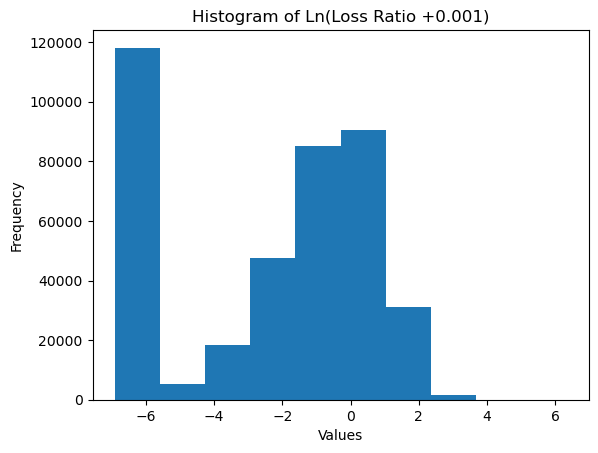

In [4]:
plt.hist(result['Ln_LR'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Ln(Loss Ratio +0.001)')
plt.show()

In [5]:
#Lasso for >0, close to normal ish without load at 0
#KNN or Log for =0

In [6]:
filt_result= result[result['Loss.Ratio']>0]

In [7]:
filt_result.loc[:,'Ln_LR']=np.log(filt_result['Loss.Ratio'])

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\3690486982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_result.loc[:,'Ln_LR']=np.log(filt_result['Loss.Ratio'])


In [8]:
filt_result.head(30)

,ID,Commodity.Code,Coverage.Level,Total.Premium,Indemnity.Amount,Net.Planted.Quantity,Liability,Loss.Ratio,Ln_LR
2,1989_01005,21,CAT,846.0,8507,102.0,11751.0,10.055556,2.308125
5,1989_01033,21,CAT,16336.0,15277,1718.0,258543.0,0.935174,-0.067023
10,1989_01039,81,CAT,723.0,1031,107.0,4627.0,1.426003,0.354875
12,1989_01045,41,CAT,880.0,311,416.0,9047.0,0.353409,-1.040129
14,1989_01047,81,CAT,266.0,1423,39.0,1567.0,5.349624,1.677026
20,1989_01067,21,CAT,1649.0,6927,172.0,17747.0,4.200728,1.435258
22,1989_01069,81,CAT,209.0,1203,39.0,1203.0,5.755981,1.750239
23,1989_01077,21,CAT,10546.0,9922,1731.0,191308.0,0.940831,-0.060992
24,1989_01077,41,CAT,3872.0,102,1350.0,47284.0,0.026343,-3.636554
25,1989_01077,81,CAT,2532.0,1260,625.0,26839.0,0.497630,-0.697898


In [9]:
#Creates new dataframe, where each row for an ID has the Loss Ratio for each Coverage X Commodity
wide = result.pivot_table( index=['ID'],columns=['Commodity.Code','Coverage.Level'], values=['Loss.Ratio'])

#wide = wide.reset_index().copy()
wide.head()

Loss.Ratio                                                  \
Commodity.Code         11            21                   41       51       
Coverage.Level        BUY CAT       BUY        CAT       BUY  CAT BUY CAT   
ID                                                                          
1989_01001            NaN NaN  1.122985        NaN  0.000000  0.0 NaN NaN   
1989_01003       5.961480 NaN  0.316592        NaN  0.114442  0.0 NaN NaN   
1989_01005            NaN NaN  1.917953  10.055556  1.622552  0.0 NaN NaN   
1989_01031       3.704942 NaN  4.096840        NaN  0.000000  0.0 NaN NaN   
1989_01033            NaN NaN  1.952855   0.935174  0.000000  0.0 NaN NaN   

                                           
Commodity.Code        81       88  91      
Coverage.Level       BUY  CAT BUY BUY CAT  
ID                                         
1989_01001           NaN  NaN NaN NaN NaN  
1989_01003      1.050901  NaN NaN NaN NaN  
1989_01005           NaN  NaN NaN NaN NaN  
1989_01031      2.603691  NaN NaN NaN NaN  
1989_01033      1.416871  0.0 NaN NaN NaN

In [10]:
#Creates new dataframe, where each row for an ID has the Loss Ratio for each Coverage X Commodity
filtwide = filt_result.pivot_table( index=['ID'],columns=['Commodity.Code','Coverage.Level'], values=['Loss.Ratio'])

#wide = wide.reset_index().copy()
filtwide.head()

Loss.Ratio                                                 \
Commodity.Code         11            21                   41      51       
Coverage.Level        BUY CAT       BUY        CAT       BUY CAT BUY CAT   
ID                                                                         
1989_01001            NaN NaN  1.122985        NaN       NaN NaN NaN NaN   
1989_01003       5.961480 NaN  0.316592        NaN  0.114442 NaN NaN NaN   
1989_01005            NaN NaN  1.917953  10.055556  1.622552 NaN NaN NaN   
1989_01031       3.704942 NaN  4.096840        NaN       NaN NaN NaN NaN   
1989_01033            NaN NaN  1.952855   0.935174       NaN NaN NaN NaN   

                                          
Commodity.Code        81      88  91      
Coverage.Level       BUY CAT BUY BUY CAT  
ID                                        
1989_01001           NaN NaN NaN NaN NaN  
1989_01003      1.050901 NaN NaN NaN NaN  
1989_01005           NaN NaN NaN NaN NaN  
1989_01031      2.603691 NaN NaN NaN NaN  
1989_01033      1.416871 NaN NaN NaN NaN

In [11]:
Ys = ['BUY11','CAT11','BUY21','CAT21','BUY41','CAT41','BUY51','CAT51','BUY81','CAT81','BUY88','BUY91','CAT91']

#f=wide.reset_index()
# Create a new dictionary to store the new DataFrames
main_Y = {}
scaler = StandardScaler()

# Reset the index of the original DataFrame
filt_result_reset_index = filt_result.reset_index(drop = False)


# Iterate over the columns of the pivot table
for column in filtwide.columns:
    # Get the column values and reshape them
    column_values = filtwide[column].values.reshape(-1, 1)

    # Fit and transform the column values using the scaler
    scaled_values = scaler.fit_transform(column_values)

    # Recover the index from the filtwide DataFrame
    recovered_index = filtwide.index

    # Create a new DataFrame with the scaled values and the recovered index
    new_dataframe = pd.DataFrame(scaled_values, index=recovered_index, columns=[column])

    # Add the new DataFrame to the dictionary
    main_Y[column] = new_dataframe
    


In [12]:
main_Y= dict(zip( Ys, main_Y.values()))

In [13]:
for key, dataframe in main_Y.items():
    main_Y[key] = dataframe.dropna()

In [14]:
temp = wide.reset_index().copy()
missing= temp.copy()
missing.iloc[:,1:] = pd.isna(missing.iloc[:,1:]).astype(int)
#missing['ID'] = new_df['Category'].fillna(0)
missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64593 entries, 0 to 64592
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   (ID, , )               64593 non-null  object
 1   (Loss.Ratio, 11, BUY)  64593 non-null  int32 
 2   (Loss.Ratio, 11, CAT)  64593 non-null  int32 
 3   (Loss.Ratio, 21, BUY)  64593 non-null  int32 
 4   (Loss.Ratio, 21, CAT)  64593 non-null  int32 
 5   (Loss.Ratio, 41, BUY)  64593 non-null  int32 
 6   (Loss.Ratio, 41, CAT)  64593 non-null  int32 
 7   (Loss.Ratio, 51, BUY)  64593 non-null  int32 
 8   (Loss.Ratio, 51, CAT)  64593 non-null  int32 
 9   (Loss.Ratio, 81, BUY)  64593 non-null  int32 
 10  (Loss.Ratio, 81, CAT)  64593 non-null  int32 
 11  (Loss.Ratio, 88, BUY)  64593 non-null  int32 
 12  (Loss.Ratio, 91, BUY)  64593 non-null  int32 
 13  (Loss.Ratio, 91, CAT)  64593 non-null  int32 
dtypes: int32(13), object(1)
memory usage: 3.7+ MB


C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\3111729491.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  missing.iloc[:,1:] = pd.isna(missing.iloc[:,1:]).astype(int)


In [15]:
missing['ID']=missing['ID'].astype(str)
missing['State']=missing['ID'].str[5:7]
missing['State']

0        01
1        01
2        01
3        01
4        01
         ..
64588    56
64589    56
64590    56
64591    56
64592    56
Name: State, Length: 64593, dtype: object

In [16]:
missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64593 entries, 0 to 64592
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   (ID, , )               64593 non-null  object
 1   (Loss.Ratio, 11, BUY)  64593 non-null  int32 
 2   (Loss.Ratio, 11, CAT)  64593 non-null  int32 
 3   (Loss.Ratio, 21, BUY)  64593 non-null  int32 
 4   (Loss.Ratio, 21, CAT)  64593 non-null  int32 
 5   (Loss.Ratio, 41, BUY)  64593 non-null  int32 
 6   (Loss.Ratio, 41, CAT)  64593 non-null  int32 
 7   (Loss.Ratio, 51, BUY)  64593 non-null  int32 
 8   (Loss.Ratio, 51, CAT)  64593 non-null  int32 
 9   (Loss.Ratio, 81, BUY)  64593 non-null  int32 
 10  (Loss.Ratio, 81, CAT)  64593 non-null  int32 
 11  (Loss.Ratio, 88, BUY)  64593 non-null  int32 
 12  (Loss.Ratio, 91, BUY)  64593 non-null  int32 
 13  (Loss.Ratio, 91, CAT)  64593 non-null  int32 
 14  (State, , )            64593 non-null  object
dtypes: int32(13), objec

In [17]:
# One-hot encode the categorical variable
encoded_df = pd.get_dummies(missing['State'], drop_first=True)

# Concatenate the encoded dataframe with the original dataframe
missing_state = pd.concat([missing, encoded_df], axis=1)
#missing_state.info()
#df = missing_state.drop(missing_state.columns[0], axis=1)
#df.info()
resul2 = missing_state.drop(missing_state.columns[14], axis=1)
resul2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64593 entries, 0 to 64592
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   (ID, , )               64593 non-null  object
 1   (Loss.Ratio, 11, BUY)  64593 non-null  int32 
 2   (Loss.Ratio, 11, CAT)  64593 non-null  int32 
 3   (Loss.Ratio, 21, BUY)  64593 non-null  int32 
 4   (Loss.Ratio, 21, CAT)  64593 non-null  int32 
 5   (Loss.Ratio, 41, BUY)  64593 non-null  int32 
 6   (Loss.Ratio, 41, CAT)  64593 non-null  int32 
 7   (Loss.Ratio, 51, BUY)  64593 non-null  int32 
 8   (Loss.Ratio, 51, CAT)  64593 non-null  int32 
 9   (Loss.Ratio, 81, BUY)  64593 non-null  int32 
 10  (Loss.Ratio, 81, CAT)  64593 non-null  int32 
 11  (Loss.Ratio, 88, BUY)  64593 non-null  int32 
 12  (Loss.Ratio, 91, BUY)  64593 non-null  int32 
 13  (Loss.Ratio, 91, CAT)  64593 non-null  int32 
 14  04                     64593 non-null  uint8 
 15  05                 

In [18]:
missing_state = resul2
new_columns = [(col[0],col[1] ,col[2] + ' missing') if i < 14 and i>0 else col for i, col in enumerate(missing_state.columns)]
missing_state.rename(columns=dict(zip(missing_state.columns, new_columns)), inplace=True)

In [19]:
missing_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64593 entries, 0 to 64592
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   (ID, , )                       64593 non-null  object
 1   (Loss.Ratio, 11, BUY missing)  64593 non-null  int32 
 2   (Loss.Ratio, 11, CAT missing)  64593 non-null  int32 
 3   (Loss.Ratio, 21, BUY missing)  64593 non-null  int32 
 4   (Loss.Ratio, 21, CAT missing)  64593 non-null  int32 
 5   (Loss.Ratio, 41, BUY missing)  64593 non-null  int32 
 6   (Loss.Ratio, 41, CAT missing)  64593 non-null  int32 
 7   (Loss.Ratio, 51, BUY missing)  64593 non-null  int32 
 8   (Loss.Ratio, 51, CAT missing)  64593 non-null  int32 
 9   (Loss.Ratio, 81, BUY missing)  64593 non-null  int32 
 10  (Loss.Ratio, 81, CAT missing)  64593 non-null  int32 
 11  (Loss.Ratio, 88, BUY missing)  64593 non-null  int32 
 12  (Loss.Ratio, 91, BUY missing)  64593 non-null  int32 
 13  (

In [20]:


Losses = temp.iloc[:,1:].copy()
# Mean imputation: Replace missing values with 0


# Standardize the values using StandardScaler
scaler = StandardScaler()
scaled_Losses = pd.DataFrame(scaler.fit_transform(Losses),columns=Losses.columns)


scaled_Losses.fillna(0, inplace=True)
scaled_Losses.head()

Loss.Ratio                                                    \
Commodity.Code         11             21                  41             51   
Coverage.Level        BUY  CAT       BUY       CAT       BUY       CAT  BUY   
0                0.000000  0.0  0.003630  0.000000 -0.643402 -0.205115  0.0   
1                2.940215  0.0 -0.587869  0.000000 -0.566778 -0.205115  0.0   
2                0.000000  0.0  0.586749  4.421368  0.442961 -0.205115  0.0   
3                1.567124  0.0  2.184990  0.000000 -0.643402 -0.205115  0.0   
4                0.000000  0.0  0.612351  0.110448 -0.643402 -0.205115  0.0   

                                                        
Commodity.Code             81             88   91       
Coverage.Level  CAT       BUY       CAT  BUY  BUY  CAT  
0               0.0  0.000000  0.000000  0.0  0.0  0.0  
1               0.0  0.175180  0.000000  0.0  0.0  0.0  
2               0.0  0.000000  0.000000  0.0  0.0  0.0  
3               0.0  1.514268  0.000000  0.0  0.0  0.0  
4               0.0  0.490784 -0.294429  0.0  0.0  0.0

In [21]:
FullData= pd.concat([scaled_Losses, missing_state], axis=1)
FullData = FullData.rename(columns={('ID', '', ''): 'ID'})
FullData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64593 entries, 0 to 64592
Data columns (total 73 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   (Loss.Ratio, 11, BUY)          64593 non-null  float64
 1   (Loss.Ratio, 11, CAT)          64593 non-null  float64
 2   (Loss.Ratio, 21, BUY)          64593 non-null  float64
 3   (Loss.Ratio, 21, CAT)          64593 non-null  float64
 4   (Loss.Ratio, 41, BUY)          64593 non-null  float64
 5   (Loss.Ratio, 41, CAT)          64593 non-null  float64
 6   (Loss.Ratio, 51, BUY)          64593 non-null  float64
 7   (Loss.Ratio, 51, CAT)          64593 non-null  float64
 8   (Loss.Ratio, 81, BUY)          64593 non-null  float64
 9   (Loss.Ratio, 81, CAT)          64593 non-null  float64
 10  (Loss.Ratio, 88, BUY)          64593 non-null  float64
 11  (Loss.Ratio, 91, BUY)          64593 non-null  float64
 12  (Loss.Ratio, 91, CAT)          64593 non-null 

In [22]:
# Y = Loss Ratio
# X = Other Normalized loss ratios, binary for missing, state hot-coded
# , interact state hot coded with other X

## set values for alpha
alphas = [0.001,0.01,0.25,0.5,1]


kfold = KFold(n_splits=5,
                 shuffle=True,
                 random_state=431)

#df_train, df_test = train_test_split(new_dataset.copy(), 
#                                            shuffle=True,
#                                            random_state=614,
#                                            test_size=.2)


In [23]:
#Drop Y variable columns from X dataset
temp = FullData.drop(FullData.columns[0],axis=1).copy()
temp.info()
temp = temp.drop(temp.columns[13],axis=1).copy()
temp.info()
# Reset the index of 'Name1' DataFrame
df1 = main_Y['BUY11'].reset_index()

# Perform the left join
new_dataset = df1.merge(temp, on='ID', how='left')


df_train, df_test = train_test_split(new_dataset.copy(), 
                                            shuffle=True,
                                            random_state=614,
                                            test_size=.2)
# These will hold our coefficient estimates
lasso_coefs = np.zeros((len(alphas), kfold.n_splits, df_train.shape[1]-1))

mses = np.zeros((len(alphas), kfold.n_splits))
df_train.columns = [str(col) for col in df_train.columns]

# DataFrames to hold results
results = pd.DataFrame(columns=['alpha', 'avg_mse'])
coef_results = pd.DataFrame()

# Loop over alphas
for alpha in alphas:
    lasso_mse_values = []
    coef_values = []
    linear_mse_values = []
    
    # Loop over kfolds
    for train, test in kfold.split(df_train):
        # Define X and Y for train and test sets
        X_train = df_train.iloc[train, 2:]
        Y_train = df_train.iloc[train, 1]
        X_test = df_train.iloc[test, 2:]
        Y_test = df_train.iloc[test, 1]

        # Perform Lasso regression
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, Y_train)
        Y_pred_lasso = lasso.predict(X_test)

        # Calculate Lasso mean squared error and save it
        lasso_mse = mean_squared_error(Y_test, Y_pred_lasso)
        lasso_mse_values.append(lasso_mse)

        # Save coefficients
        coef_values.append(lasso.coef_)
        
        # Define X and Y for train and test sets. Only select columns in subset_cols for X.
        X_train_lin = df_train.iloc[train, 26:]
        X_test_lin = df_train.iloc[test, 26:]

    
        linreg=LinearRegression()
        linreg.fit(X_train_lin, Y_train)
        Y_pred_lin = linreg.predict(X_test_lin)

        # Calculate mean squared error and save it
        mse_lin = mean_squared_error(Y_test, Y_pred_lin)
        linear_mse_values.append(mse_lin)
        
    # Calculate average mse for current alpha
    lin_avg_mse = np.mean(linear_mse_values)
    avg_mse = np.mean(lasso_mse_values)
    results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)

    # Calculate average coefficient and zero count for each explanatory variable
    coef_array = np.array(coef_values)
    zero_counts = (coef_array == 0).sum(axis=0)
    non_zero_means = np.where(zero_counts != 5, np.mean(coef_array, where=(coef_array!=0), axis=0), 0)
    coef_df = pd.DataFrame({'alpha': alpha, 'zero_count': zero_counts, 'non_zero_mean': non_zero_means},
                           index=df_train.columns[2:])
    coef_results = pd.concat([coef_results, coef_df])
    print(coef_values)
    
results.to_csv('BUY11results.csv', index=False)
coef_results.to_csv('BUY11coef_results.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64593 entries, 0 to 64592
Data columns (total 72 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   (Loss.Ratio, 11, CAT)          64593 non-null  float64
 1   (Loss.Ratio, 21, BUY)          64593 non-null  float64
 2   (Loss.Ratio, 21, CAT)          64593 non-null  float64
 3   (Loss.Ratio, 41, BUY)          64593 non-null  float64
 4   (Loss.Ratio, 41, CAT)          64593 non-null  float64
 5   (Loss.Ratio, 51, BUY)          64593 non-null  float64
 6   (Loss.Ratio, 51, CAT)          64593 non-null  float64
 7   (Loss.Ratio, 81, BUY)          64593 non-null  float64
 8   (Loss.Ratio, 81, CAT)          64593 non-null  float64
 9   (Loss.Ratio, 88, BUY)          64593 non-null  float64
 10  (Loss.Ratio, 91, BUY)          64593 non-null  float64
 11  (Loss.Ratio, 91, CAT)          64593 non-null  float64
 12  ID                             64593 non-null 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1557650904.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.36381824,  0.05952656, -0.01014714,  0.0663102 , -0.02855332,
        0.07790458,  0.00114058,  0.06682941,  0.00935083, -0.01396915,
        0.2291933 ,  0.05851244,  0.36413549, -0.01508781, -0.0287237 ,
        0.01264285,  0.        ,  0.07105014,  0.04095201,  0.03841173,
        0.00634358,  0.19351327,  0.08327996, -0.02524067,  0.        ,
        0.0766606 ,  0.07190743, -0.06009794,  0.        ,  0.        ,
        0.        ,  0.13637827, -0.03969207, -0.        , -0.        ,
        0.24366823, -0.09173732,  0.        ,  0.15474174,  0.        ,
        0.42002512,  0.        , -0.07675073, -0.13140448,  0.19021969,
       -0.01650708, -0.12342875, -0.12656373, -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.13547935,
       -0.13560441, -0.        ,  0.        ,  0.22021098,  0.        ,
       -0.1348482 ,  0.        , -0.00326507,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.06734549,  0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1557650904.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.35920544,  0.02397553, -0.        ,  0.05706222, -0.        ,
        0.07039145,  0.        ,  0.05995166,  0.        , -0.        ,
        0.20771943,  0.01012229,  0.33028003, -0.04497287, -0.02010993,
        0.        ,  0.        ,  0.05788611,  0.        ,  0.        ,
        0.        ,  0.15529978,  0.04208296,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1557650904.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.111149,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      , -0.      , -0.      ,  0.      ,  0.      ,  0.      ,
        0.      , -0.      , -0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      , -0.      ,  0.      ,  0.      ,
        0.      ,  0.      , -0.      ,  0.      ,  0.      ,  0.      ,
       -0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
       -0.      , -0.      ,  0.      , -0.      , -0.      , -0.      ,
       -0.      ,  0.      ,  0.      , -0.      ,  0.      ,  0.      ,
       -0.      , -0.      , -0.      ,  0.      ,  0.      ,  0.      ,
       -0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
       -0.      ,  0.      , -0.      ,  0.      ]), array([ 0.10265904,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1557650904.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0., -0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.,
        0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,
        0.,  0.,  0., -0., -0.,  0., -0., -0., -0.,  0.,  0.,  0., -0.,
        0.,  0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,
        0., -0.,  0., -0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,
        0.,  0.,  0., -0., -0.,  0., -0., -0., -0.,  0.,  0.,  0., -0.,
       -0.,  0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,
        0., -0.,  0., -0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0.,  0., -0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0., 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1557650904.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [24]:
FullData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64593 entries, 0 to 64592
Data columns (total 73 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   (Loss.Ratio, 11, BUY)          64593 non-null  float64
 1   (Loss.Ratio, 11, CAT)          64593 non-null  float64
 2   (Loss.Ratio, 21, BUY)          64593 non-null  float64
 3   (Loss.Ratio, 21, CAT)          64593 non-null  float64
 4   (Loss.Ratio, 41, BUY)          64593 non-null  float64
 5   (Loss.Ratio, 41, CAT)          64593 non-null  float64
 6   (Loss.Ratio, 51, BUY)          64593 non-null  float64
 7   (Loss.Ratio, 51, CAT)          64593 non-null  float64
 8   (Loss.Ratio, 81, BUY)          64593 non-null  float64
 9   (Loss.Ratio, 81, CAT)          64593 non-null  float64
 10  (Loss.Ratio, 88, BUY)          64593 non-null  float64
 11  (Loss.Ratio, 91, BUY)          64593 non-null  float64
 12  (Loss.Ratio, 91, CAT)          64593 non-null 

In [25]:
#Drop Y variable columns from X dataset
temp = FullData.drop(FullData.columns[1],axis=1).copy()
#temp.info()
temp = temp.drop(temp.columns[14],axis=1).copy()
#temp.info()
# Reset the index of 'Name1' DataFrame
df1 = main_Y['CAT11'].reset_index()

# Perform the left join
new_dataset = df1.merge(temp, on='ID', how='left')

#states_only = new_dataset.columns[25:] 

#new_dataset
df_train, df_test = train_test_split(new_dataset.copy(), 
                                            shuffle=True,
                                            random_state=614,
                                            test_size=.2)
# These will hold our coefficient estimates
lasso_coefs = np.zeros((len(alphas), kfold.n_splits, df_train.shape[1]-1))

mses = np.zeros((len(alphas), kfold.n_splits))
df_train.columns = [str(col) for col in df_train.columns]

# DataFrames to hold results
results = pd.DataFrame(columns=['alpha', 'avg_mse'])
coef_results = pd.DataFrame()

# Loop over alphas
for alpha in alphas:
    lasso_mse_values = []
    coef_values = []
    linear_mse_values = []
    
    # Loop over kfolds
    for train, test in kfold.split(df_train):
        # Define X and Y for train and test sets
        X_train = df_train.iloc[train, 2:]
        Y_train = df_train.iloc[train, 1]
        X_test = df_train.iloc[test, 2:]
        Y_test = df_train.iloc[test, 1]

        # Perform Lasso regression
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, Y_train)
        Y_pred_lasso = lasso.predict(X_test)

        # Calculate Lasso mean squared error and save it
        lasso_mse = mean_squared_error(Y_test, Y_pred_lasso)
        lasso_mse_values.append(lasso_mse)

        # Save coefficients
        coef_values.append(lasso.coef_)
        
        # Define X and Y for train and test sets. Only select columns in subset_cols for X.
        X_train_lin = df_train.iloc[train, 26:]
        X_test_lin = df_train.iloc[test, 26:]

    
        linreg=LinearRegression()
        linreg.fit(X_train_lin, Y_train)
        Y_pred_lin = linreg.predict(X_test_lin)

        # Calculate mean squared error and save it
        mse_lin = mean_squared_error(Y_test, Y_pred_lin)
        linear_mse_values.append(mse_lin)
        
    # Calculate average mse for current alpha
    lin_avg_mse = np.mean(linear_mse_values)
    avg_mse = np.mean(lasso_mse_values)
    results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)

    # Calculate average coefficient and zero count for each explanatory variable
    coef_array = np.array(coef_values)
    zero_counts = (coef_array == 0).sum(axis=0)
    non_zero_means = np.where(zero_counts != 5, np.mean(coef_array, where=(coef_array!=0), axis=0), 0)
    coef_df = pd.DataFrame({'alpha': alpha, 'zero_count': zero_counts, 'non_zero_mean': non_zero_means},
                           index=df_train.columns[2:])
    coef_results = pd.concat([coef_results, coef_df])
    print(coef_values)
    
results.to_csv('CAT11results.csv', index=False)
coef_results.to_csv('CAT11coef_results.csv')

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\2422322505.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.45577031, -0.00794001,  0.03765797, -0.02972245,  0.09364113,
       -0.        ,  0.03571521, -0.02688591,  0.11258113, -0.02758478,
        0.        ,  0.08938406,  0.16641658, -0.        ,  0.08421534,
       -0.14911088,  0.1909722 ,  0.02906359,  0.15528433, -0.12939073,
        0.0703736 , -0.11777   ,  0.05802795,  0.20949934,  0.        ,
       -0.09664123, -0.09730067, -0.14291018,  0.        ,  0.        ,
        0.12657124,  0.0525828 ,  0.00342989,  0.0591429 ,  0.23358488,
        0.11744717, -0.06514934, -0.        ,  0.13376758,  0.        ,
       -0.        ,  0.        , -0.00245985,  0.        ,  0.11466818,
       -0.10921974, -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.05759861, -0.07211873, -0.09111122,
        0.02061774, -0.20110088, -0.        ,  0.21302081, -0.03799856,
       -0.01727029,  0.        , -0.1100542 , -0.        ,  0.        ,
        0.17546623, -0.07365846,  0.        ,  0.        ,  0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\2422322505.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.46103709, -0.        ,  0.        , -0.00052058,  0.03685144,
        0.        ,  0.01869394, -0.00746016,  0.08458128, -0.        ,
        0.        ,  0.05049608,  0.        ,  0.        ,  0.04367259,
       -0.        ,  0.        ,  0.        ,  0.17422791, -0.06972002,
       -0.        , -0.04879569,  0.00350544,  0.17633591,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\2422322505.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.23791244,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\2422322505.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
        0.,  0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0., -0., -0.,
       -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,
        0.,  0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0.,  0.,  0., -0.,
        0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0., -0.,  0.,
        0., -0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
        0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0., -0.,
       -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,
        0.,  0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0.,  0.,  0., -0.,
       -0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0., -0.,  0.,
        0., -0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
        0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0., -0.,
       -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0., 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\2422322505.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [26]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20608 entries, 0 to 20607
Data columns (total 72 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             20608 non-null  object 
 1   (Loss.Ratio, 11, CAT)          20608 non-null  float64
 2   (Loss.Ratio, 11, BUY)          20608 non-null  float64
 3   (Loss.Ratio, 21, BUY)          20608 non-null  float64
 4   (Loss.Ratio, 21, CAT)          20608 non-null  float64
 5   (Loss.Ratio, 41, BUY)          20608 non-null  float64
 6   (Loss.Ratio, 41, CAT)          20608 non-null  float64
 7   (Loss.Ratio, 51, BUY)          20608 non-null  float64
 8   (Loss.Ratio, 51, CAT)          20608 non-null  float64
 9   (Loss.Ratio, 81, BUY)          20608 non-null  float64
 10  (Loss.Ratio, 81, CAT)          20608 non-null  float64
 11  (Loss.Ratio, 88, BUY)          20608 non-null  float64
 12  (Loss.Ratio, 91, BUY)          20608 non-null 

In [27]:
#Drop Y variable columns from X dataset
temp = FullData.drop(FullData.columns[2],axis=1).copy()
#temp.info()
temp = temp.drop(temp.columns[15],axis=1).copy()
#temp.info()
# Reset the index of 'Name1' DataFrame
df1 = main_Y['BUY21'].reset_index()

# Perform the left join
new_dataset = df1.merge(temp, on='ID', how='left')
df_train, df_test = train_test_split(new_dataset.copy(), 
                                            shuffle=True,
                                            random_state=614,
                                            test_size=.2)
# These will hold our coefficient estimates
lasso_coefs = np.zeros((len(alphas), kfold.n_splits, df_train.shape[1]-1))

mses = np.zeros((len(alphas), kfold.n_splits))
df_train.columns = [str(col) for col in df_train.columns]

# DataFrames to hold results
results = pd.DataFrame(columns=['alpha', 'avg_mse'])
coef_results = pd.DataFrame()

# Loop over alphas
for alpha in alphas:
    lasso_mse_values = []
    coef_values = []
    linear_mse_values = []
    
    # Loop over kfolds
    for train, test in kfold.split(df_train):
        # Define X and Y for train and test sets
        X_train = df_train.iloc[train, 2:]
        Y_train = df_train.iloc[train, 1]
        X_test = df_train.iloc[test, 2:]
        Y_test = df_train.iloc[test, 1]

        # Perform Lasso regression
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, Y_train)
        Y_pred_lasso = lasso.predict(X_test)

        # Calculate Lasso mean squared error and save it
        lasso_mse = mean_squared_error(Y_test, Y_pred_lasso)
        lasso_mse_values.append(lasso_mse)

        # Save coefficients
        coef_values.append(lasso.coef_)
        
        # Define X and Y for train and test sets. Only select columns in subset_cols for X.
        X_train_lin = df_train.iloc[train, 26:]
        X_test_lin = df_train.iloc[test, 26:]

    
        linreg=LinearRegression()
        linreg.fit(X_train_lin, Y_train)
        Y_pred_lin = linreg.predict(X_test_lin)

        # Calculate mean squared error and save it
        mse_lin = mean_squared_error(Y_test, Y_pred_lin)
        linear_mse_values.append(mse_lin)
        
    # Calculate average mse for current alpha
    lin_avg_mse = np.mean(linear_mse_values)
    avg_mse = np.mean(lasso_mse_values)
    results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)

    # Calculate average coefficient and zero count for each explanatory variable
    coef_array = np.array(coef_values)
    zero_counts = (coef_array == 0).sum(axis=0)
    non_zero_means = np.where(zero_counts != 5, np.mean(coef_array, where=(coef_array!=0), axis=0), 0)
    coef_df = pd.DataFrame({'alpha': alpha, 'zero_count': zero_counts, 'non_zero_mean': non_zero_means},
                           index=df_train.columns[2:])
    coef_results = pd.concat([coef_results, coef_df])
    print(coef_values)
    
results.to_csv('BUY21results.csv', index=False)
coef_results.to_csv('BUY21coef_results.csv')

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\2416492839.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.06103703, -0.01209638,  0.32822136,  0.14244638,  0.0426201 ,
        0.11622793,  0.03882059,  0.14276177,  0.04177932,  0.1068172 ,
        0.10607464,  0.02993092,  0.09719019, -0.12448522,  0.24683671,
        0.13686463,  0.00295755,  0.05321827, -0.01508833,  0.08764721,
       -0.04263217,  0.07334811,  0.        , -0.06211362, -0.        ,
        0.32316096,  0.44577258,  0.        ,  0.        ,  0.        ,
        0.        , -0.04244582,  0.        ,  0.        ,  0.        ,
        0.        ,  0.07260933,  0.        ,  0.12745065,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.0147469 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.05856657,  0.        , -0.        ,  0.        ,
        0.        ,  0.09956982,  0.        ,  0.        , -0.        ,
        0.        , -0.02221102,  0.03359553,  0.        ,  0.        ,
       -0.15555966,  0.        ,  0.        ,  0.        ,  0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\2416492839.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.05010369, -0.        ,  0.32032503,  0.15381533,  0.00556004,
        0.11992126,  0.02370296,  0.13797586,  0.02465449,  0.06224761,
        0.        ,  0.        ,  0.        , -0.0470225 ,  0.13751344,
        0.11332739,  0.        ,  0.        , -0.        ,  0.04928356,
        0.        ,  0.02098235, -0.        , -0.        ,  0.        ,
        0.03090769,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.01987781,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\2416492839.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.        ,  0.        ,  0.11009778,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\2416492839.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0.,
        0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0.,
       -0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0.,
        0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0.,
       -0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0.,
        0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0., 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\2416492839.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [28]:
#Drop Y variable columns from X dataset
temp = FullData.drop(FullData.columns[3],axis=1).copy()
#temp.info()
temp = temp.drop(temp.columns[16],axis=1).copy()
#temp.info()
# Reset the index of 'Name1' DataFrame
df1 = main_Y['CAT21'].reset_index()

# Perform the left join
new_dataset = df1.merge(temp, on='ID', how='left')
df_train, df_test = train_test_split(new_dataset.copy(), 
                                            shuffle=True,
                                            random_state=614,
                                            test_size=.2)
# These will hold our coefficient estimates
lasso_coefs = np.zeros((len(alphas), kfold.n_splits, df_train.shape[1]-1))

mses = np.zeros((len(alphas), kfold.n_splits))
df_train.columns = [str(col) for col in df_train.columns]

# DataFrames to hold results
results = pd.DataFrame(columns=['alpha', 'avg_mse'])
coef_results = pd.DataFrame()

# Loop over alphas
for alpha in alphas:
    lasso_mse_values = []
    coef_values = []
    linear_mse_values = []
    
    # Loop over kfolds
    for train, test in kfold.split(df_train):
        # Define X and Y for train and test sets
        X_train = df_train.iloc[train, 2:]
        Y_train = df_train.iloc[train, 1]
        X_test = df_train.iloc[test, 2:]
        Y_test = df_train.iloc[test, 1]

        # Perform Lasso regression
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, Y_train)
        Y_pred_lasso = lasso.predict(X_test)

        # Calculate Lasso mean squared error and save it
        lasso_mse = mean_squared_error(Y_test, Y_pred_lasso)
        lasso_mse_values.append(lasso_mse)

        # Save coefficients
        coef_values.append(lasso.coef_)
        
        # Define X and Y for train and test sets. Only select columns in subset_cols for X.
        X_train_lin = df_train.iloc[train, 26:]
        X_test_lin = df_train.iloc[test, 26:]

    
        linreg=LinearRegression()
        linreg.fit(X_train_lin, Y_train)
        Y_pred_lin = linreg.predict(X_test_lin)

        # Calculate mean squared error and save it
        mse_lin = mean_squared_error(Y_test, Y_pred_lin)
        linear_mse_values.append(mse_lin)
        
    # Calculate average mse for current alpha
    lin_avg_mse = np.mean(linear_mse_values)
    avg_mse = np.mean(lasso_mse_values)
    results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)

    # Calculate average coefficient and zero count for each explanatory variable
    coef_array = np.array(coef_values)
    zero_counts = (coef_array == 0).sum(axis=0)
    non_zero_means = np.where(zero_counts != 5, np.mean(coef_array, where=(coef_array!=0), axis=0), 0)
    coef_df = pd.DataFrame({'alpha': alpha, 'zero_count': zero_counts, 'non_zero_mean': non_zero_means},
                           index=df_train.columns[2:])
    coef_results = pd.concat([coef_results, coef_df])
    print(coef_values)
    
results.to_csv('CAT21results.csv', index=False)
coef_results.to_csv('CAT21coef_results.csv')

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\258657823.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\258657823.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWa

[array([ 0.0203157 ,  0.03090644,  0.39330492, -0.04113581,  0.03850658,
       -0.03368374,  0.06643848,  0.00589023,  0.01313718,  0.0132026 ,
       -0.        , -0.        , -0.03940623,  0.21795662,  0.23718334,
       -0.13777705,  0.08006019, -0.15259626,  0.05713032, -0.02706261,
        0.12489274, -0.15513008, -0.        ,  0.13857941, -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.09879252, -0.01293225,  0.        ,  0.        ,  0.        ,
        0.        ,  0.46032594,  0.        , -0.15419165,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.06399872,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.30521832,  0.        ,
        0.        ,  0.0356755 ,  0.        ,  0.        ,  0.11284814,
        0.        ,  0.07284911,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\258657823.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.        ,  0.        ,  0.16542143,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\258657823.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\258657823.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWa

[array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0., -0., -0.,
        0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
        0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
       -0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0., -0., -0.,
        0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
        0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
       -0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0., -0., -0.,
       -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0., 

In [29]:
#Drop Y variable columns from X dataset
temp = FullData.drop(FullData.columns[4],axis=1).copy()
#temp.info()
temp = temp.drop(temp.columns[17],axis=1).copy()
#temp.info()
# Reset the index of 'Name1' DataFrame
df1 = main_Y['BUY41'].reset_index()

# Perform the left join
new_dataset = df1.merge(temp, on='ID', how='left')
df_train, df_test = train_test_split(new_dataset.copy(), 
                                            shuffle=True,
                                            random_state=614,
                                            test_size=.2)
# These will hold our coefficient estimates
lasso_coefs = np.zeros((len(alphas), kfold.n_splits, df_train.shape[1]-1))

mses = np.zeros((len(alphas), kfold.n_splits))
df_train.columns = [str(col) for col in df_train.columns]

# DataFrames to hold results
results = pd.DataFrame(columns=['alpha', 'avg_mse'])
coef_results = pd.DataFrame()

# Loop over alphas
for alpha in alphas:
    lasso_mse_values = []
    coef_values = []
    linear_mse_values = []
    
    # Loop over kfolds
    for train, test in kfold.split(df_train):
        # Define X and Y for train and test sets
        X_train = df_train.iloc[train, 2:]
        Y_train = df_train.iloc[train, 1]
        X_test = df_train.iloc[test, 2:]
        Y_test = df_train.iloc[test, 1]

        # Perform Lasso regression
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, Y_train)
        Y_pred_lasso = lasso.predict(X_test)

        # Calculate Lasso mean squared error and save it
        lasso_mse = mean_squared_error(Y_test, Y_pred_lasso)
        lasso_mse_values.append(lasso_mse)

        # Save coefficients
        coef_values.append(lasso.coef_)
        
        # Define X and Y for train and test sets. Only select columns in subset_cols for X.
        X_train_lin = df_train.iloc[train, 26:]
        X_test_lin = df_train.iloc[test, 26:]

    
        linreg=LinearRegression()
        linreg.fit(X_train_lin, Y_train)
        Y_pred_lin = linreg.predict(X_test_lin)

        # Calculate mean squared error and save it
        mse_lin = mean_squared_error(Y_test, Y_pred_lin)
        linear_mse_values.append(mse_lin)
        
    # Calculate average mse for current alpha
    lin_avg_mse = np.mean(linear_mse_values)
    avg_mse = np.mean(lasso_mse_values)
    results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)

    # Calculate average coefficient and zero count for each explanatory variable
    coef_array = np.array(coef_values)
    zero_counts = (coef_array == 0).sum(axis=0)
    non_zero_means = np.where(zero_counts != 5, np.mean(coef_array, where=(coef_array!=0), axis=0), 0)
    coef_df = pd.DataFrame({'alpha': alpha, 'zero_count': zero_counts, 'non_zero_mean': non_zero_means},
                           index=df_train.columns[2:])
    coef_results = pd.concat([coef_results, coef_df])
    print(coef_values)
    
results.to_csv('BUY41results.csv', index=False)
coef_results.to_csv('BUY41coef_results.csv')

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\2953261584.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.03844134,  0.00595767,  0.15784261, -0.01372797,  0.20632648,
        0.16756097,  0.07977315,  0.37400561,  0.02821772,  0.12922006,
        0.04478429,  0.        ,  0.06828612, -0.02973066, -0.00815317,
       -0.05441425,  0.10777541,  0.        , -0.02882054,  0.38134181,
       -0.        ,  0.07511106,  0.01319775,  0.02979313,  0.        ,
        0.23948151,  0.72989239, -0.08157726, -0.        , -0.        ,
        0.        , -0.        ,  0.18168239, -0.        ,  0.0052514 ,
       -0.02729933, -0.0054391 ,  0.05501956,  0.16476181,  0.        ,
       -0.        ,  0.        , -0.06171512, -0.01812001,  0.09409086,
        0.02096386, -0.        , -0.09323483,  0.        ,  0.        ,
        0.        ,  0.        , -0.1074503 ,  0.        ,  0.0347133 ,
       -0.        ,  0.12928718,  0.17535631, -0.01928358, -0.        ,
       -0.0197354 , -0.01551318, -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.02854673, -0.0

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\2953261584.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.03974003,  0.        ,  0.11717747, -0.        ,  0.20299625,
        0.16136461,  0.05201449,  0.37536425,  0.0209209 ,  0.09004989,
        0.00816907,  0.        ,  0.        , -0.        , -0.02734881,
       -0.03208623,  0.00375785, -0.        , -0.00285572,  0.3149884 ,
        0.        ,  0.01186147,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\2953261584.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.05927306,
        0.        ,  0.        ,  0.16073237,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\2953261584.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0., -0., -0.,  0., -0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0.,
        0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0., -0., -0.,  0.,  0.,
        0., -0.,  0., -0., -0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0., -0.,  0.,  0.,  0.,
        0.,  0., -0., -0., -0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0., -0., -0.,  0., -0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0.,
        0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0., -0., -0.,  0.,  0.,
        0., -0.,  0., -0., -0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0.,
       -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0.,  0.,
        0.,  0.,  0., -0., -0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0., -0., -0.,  0., -0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0.,
        0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0., -0., -0.,  0., 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\2953261584.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [30]:
#Drop Y variable columns from X dataset
temp = FullData.drop(FullData.columns[5],axis=1).copy()
#temp.info()
temp = temp.drop(temp.columns[18],axis=1).copy()
#temp.info()
# Reset the index of 'Name1' DataFrame
df1 = main_Y['CAT41'].reset_index()

# Perform the left join
new_dataset = df1.merge(temp, on='ID', how='left')
df_train, df_test = train_test_split(new_dataset.copy(), 
                                            shuffle=True,
                                            random_state=614,
                                            test_size=.2)
# These will hold our coefficient estimates
lasso_coefs = np.zeros((len(alphas), kfold.n_splits, df_train.shape[1]-1))

mses = np.zeros((len(alphas), kfold.n_splits))
df_train.columns = [str(col) for col in df_train.columns]

# DataFrames to hold results
results = pd.DataFrame(columns=['alpha', 'avg_mse'])
coef_results = pd.DataFrame()

# Loop over alphas
for alpha in alphas:
    lasso_mse_values = []
    coef_values = []
    linear_mse_values = []
    
    # Loop over kfolds
    for train, test in kfold.split(df_train):
        # Define X and Y for train and test sets
        X_train = df_train.iloc[train, 2:]
        Y_train = df_train.iloc[train, 1]
        X_test = df_train.iloc[test, 2:]
        Y_test = df_train.iloc[test, 1]

        # Perform Lasso regression
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, Y_train)
        Y_pred_lasso = lasso.predict(X_test)

        # Calculate Lasso mean squared error and save it
        lasso_mse = mean_squared_error(Y_test, Y_pred_lasso)
        lasso_mse_values.append(lasso_mse)

        # Save coefficients
        coef_values.append(lasso.coef_)
        
        # Define X and Y for train and test sets. Only select columns in subset_cols for X.
        X_train_lin = df_train.iloc[train, 26:]
        X_test_lin = df_train.iloc[test, 26:]

    
        linreg=LinearRegression()
        linreg.fit(X_train_lin, Y_train)
        Y_pred_lin = linreg.predict(X_test_lin)

        # Calculate mean squared error and save it
        mse_lin = mean_squared_error(Y_test, Y_pred_lin)
        linear_mse_values.append(mse_lin)
        
    # Calculate average mse for current alpha
    lin_avg_mse = np.mean(linear_mse_values)
    avg_mse = np.mean(lasso_mse_values)
    results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)

    # Calculate average coefficient and zero count for each explanatory variable
    coef_array = np.array(coef_values)
    zero_counts = (coef_array == 0).sum(axis=0)
    non_zero_means = np.where(zero_counts != 5, np.mean(coef_array, where=(coef_array!=0), axis=0), 0)
    coef_df = pd.DataFrame({'alpha': alpha, 'zero_count': zero_counts, 'non_zero_mean': non_zero_means},
                           index=df_train.columns[2:])
    coef_results = pd.concat([coef_results, coef_df])
    print(coef_values)
    
results.to_csv('CAT41results.csv', index=False)
coef_results.to_csv('CAT41coef_results.csv')

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1824728601.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([-0.00881651,  0.03094478, -0.00745853,  0.00418914,  0.28579819,
        0.013243  ,  0.0254728 , -0.02381188,  0.11601281, -0.0067325 ,
        0.0042516 ,  0.00182678, -0.04082432,  0.08908001,  0.01018601,
        0.02509431,  0.        , -0.01364529,  0.03038476, -0.05715205,
        0.12286032, -0.07168494,  0.        ,  0.03155085, -0.        ,
       -0.02495163, -0.        ,  0.01446729, -0.        , -0.        ,
        0.        , -0.00235727, -0.        ,  0.00792342, -0.        ,
        0.05424729,  0.05181281, -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.02422988,  0.01160841, -0.        ,
       -0.01130936,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.06823549,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.00670906,  0.        ,
       -0.        ,  0.06351523,  0.01676471,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.02215976, -0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1824728601.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([-0.        ,  0.01853736, -0.        ,  0.        ,  0.27854236,
        0.        ,  0.00926225, -0.00451057,  0.09868952, -0.        ,
        0.        ,  0.        , -0.        ,  0.03871415,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.02613846, -0.01292813,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1824728601.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.11231197,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1824728601.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0.,
       -0.,  0., -0., -0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0., -0.,
       -0., -0.,  0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,
       -0., -0.,  0.,  0.,  0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,
        0.,  0., -0., -0., -0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0.,
       -0.,  0., -0., -0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0.,
       -0., -0.,  0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,
       -0., -0.,  0.,  0.,  0., -0., -0., -0., -0., -0.,  0.,  0., -0.,
        0.,  0., -0., -0., -0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0.,
       -0.,  0., -0., -0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0., 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1824728601.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [31]:
#Drop Y variable columns from X dataset
temp = FullData.drop(FullData.columns[6],axis=1).copy()
#temp.info()
temp = temp.drop(temp.columns[19],axis=1).copy()
#temp.info()
# Reset the index of 'Name1' DataFrame
df1 = main_Y['BUY51'].reset_index()

# Perform the left join
new_dataset = df1.merge(temp, on='ID', how='left')
df_train, df_test = train_test_split(new_dataset.copy(), 
                                            shuffle=True,
                                            random_state=614,
                                            test_size=.2)
# These will hold our coefficient estimates
lasso_coefs = np.zeros((len(alphas), kfold.n_splits, df_train.shape[1]-1))

mses = np.zeros((len(alphas), kfold.n_splits))
df_train.columns = [str(col) for col in df_train.columns]

# DataFrames to hold results
results = pd.DataFrame(columns=['alpha', 'avg_mse'])
coef_results = pd.DataFrame()

# Loop over alphas
for alpha in alphas:
    lasso_mse_values = []
    coef_values = []
    linear_mse_values = []
    
    # Loop over kfolds
    for train, test in kfold.split(df_train):
        # Define X and Y for train and test sets
        X_train = df_train.iloc[train, 2:]
        Y_train = df_train.iloc[train, 1]
        X_test = df_train.iloc[test, 2:]
        Y_test = df_train.iloc[test, 1]

        # Perform Lasso regression
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, Y_train)
        Y_pred_lasso = lasso.predict(X_test)

        # Calculate Lasso mean squared error and save it
        lasso_mse = mean_squared_error(Y_test, Y_pred_lasso)
        lasso_mse_values.append(lasso_mse)

        # Save coefficients
        coef_values.append(lasso.coef_)
        
        # Define X and Y for train and test sets. Only select columns in subset_cols for X.
        X_train_lin = df_train.iloc[train, 26:]
        X_test_lin = df_train.iloc[test, 26:]

    
        linreg=LinearRegression()
        linreg.fit(X_train_lin, Y_train)
        Y_pred_lin = linreg.predict(X_test_lin)

        # Calculate mean squared error and save it
        mse_lin = mean_squared_error(Y_test, Y_pred_lin)
        linear_mse_values.append(mse_lin)
        
    # Calculate average mse for current alpha
    lin_avg_mse = np.mean(linear_mse_values)
    avg_mse = np.mean(lasso_mse_values)
    results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)

    # Calculate average coefficient and zero count for each explanatory variable
    coef_array = np.array(coef_values)
    zero_counts = (coef_array == 0).sum(axis=0)
    non_zero_means = np.where(zero_counts != 5, np.mean(coef_array, where=(coef_array!=0), axis=0), 0)
    coef_df = pd.DataFrame({'alpha': alpha, 'zero_count': zero_counts, 'non_zero_mean': non_zero_means},
                           index=df_train.columns[2:])
    coef_results = pd.concat([coef_results, coef_df])
    print(coef_values)
    
results.to_csv('BUY51results.csv', index=False)
coef_results.to_csv('BUY51coef_results.csv')

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1583296498.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 9.10777928e-02, -8.71250742e-03,  1.22443857e-01, -6.36370967e-03,
        1.66108311e-01,  5.93926883e-02,  3.03832265e-01,  1.21609323e-01,
        1.85568805e-02,  4.74881871e-02, -0.00000000e+00, -6.61422487e-03,
        1.06359385e-01,  6.58987791e-02,  0.00000000e+00, -5.98039375e-03,
        2.93009763e-01, -4.86266412e-02,  3.29515179e-01,  7.41213922e-02,
       -4.54173648e-02,  2.36439317e-01, -4.13740321e-02, -3.39462073e-02,
        0.00000000e+00,  0.00000000e+00,  1.80846308e+00, -1.59193983e-01,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  1.20299023e-01,
        0.00000000e+00, -6.20968656e-02,  0.00000000e+00,  7.11971151e-02,
       -2.92044920e-01,  4.20082363e-01,  0.00000000e+00,  0.00000000e+00,
       -1.66866007e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.97648823e-04, -1.04731940e-01,  0.00000000e+00, -1.76394846e-01,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -4.86025388e-02,
        0.00000000e+00, 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1583296498.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.09056051, -0.        ,  0.10474552, -0.        ,  0.1764009 ,
        0.03290885,  0.29772165,  0.11834441,  0.00861859,  0.01201604,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.12084725, -0.        ,  0.31847689,  0.        ,
       -0.        ,  0.22457617, -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.17701067,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.01654484,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1583296498.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.07235086,
        0.        ,  0.02357222,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1583296498.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,
        0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0.,
        0., -0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0.,  0.,
        0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,
        0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0.,
        0., -0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,
        0., -0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0., 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1583296498.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [32]:
#Drop Y variable columns from X dataset
temp = FullData.drop(FullData.columns[7],axis=1).copy()
#temp.info()
temp = temp.drop(temp.columns[20],axis=1).copy()
#temp.info()
# Reset the index of 'Name1' DataFrame
df1 = main_Y['CAT51'].reset_index()

# Perform the left join
new_dataset = df1.merge(temp, on='ID', how='left')
df_train, df_test = train_test_split(new_dataset.copy(), 
                                            shuffle=True,
                                            random_state=614,
                                            test_size=.2)
# These will hold our coefficient estimates
lasso_coefs = np.zeros((len(alphas), kfold.n_splits, df_train.shape[1]-1))

mses = np.zeros((len(alphas), kfold.n_splits))
df_train.columns = [str(col) for col in df_train.columns]

# DataFrames to hold results
results = pd.DataFrame(columns=['alpha', 'avg_mse'])
coef_results = pd.DataFrame()

# Loop over alphas
for alpha in alphas:
    lasso_mse_values = []
    coef_values = []
    linear_mse_values = []
    
    # Loop over kfolds
    for train, test in kfold.split(df_train):
        # Define X and Y for train and test sets
        X_train = df_train.iloc[train, 2:]
        Y_train = df_train.iloc[train, 1]
        X_test = df_train.iloc[test, 2:]
        Y_test = df_train.iloc[test, 1]

        # Perform Lasso regression
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, Y_train)
        Y_pred_lasso = lasso.predict(X_test)

        # Calculate Lasso mean squared error and save it
        lasso_mse = mean_squared_error(Y_test, Y_pred_lasso)
        lasso_mse_values.append(lasso_mse)

        # Save coefficients
        coef_values.append(lasso.coef_)
        
        # Define X and Y for train and test sets. Only select columns in subset_cols for X.
        X_train_lin = df_train.iloc[train, 26:]
        X_test_lin = df_train.iloc[test, 26:]

    
        linreg=LinearRegression()
        linreg.fit(X_train_lin, Y_train)
        Y_pred_lin = linreg.predict(X_test_lin)

        # Calculate mean squared error and save it
        mse_lin = mean_squared_error(Y_test, Y_pred_lin)
        linear_mse_values.append(mse_lin)
        
    # Calculate average mse for current alpha
    lin_avg_mse = np.mean(linear_mse_values)
    avg_mse = np.mean(lasso_mse_values)
    results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)

    # Calculate average coefficient and zero count for each explanatory variable
    coef_array = np.array(coef_values)
    zero_counts = (coef_array == 0).sum(axis=0)
    non_zero_means = np.where(zero_counts != 5, np.mean(coef_array, where=(coef_array!=0), axis=0), 0)
    coef_df = pd.DataFrame({'alpha': alpha, 'zero_count': zero_counts, 'non_zero_mean': non_zero_means},
                           index=df_train.columns[2:])
    coef_results = pd.concat([coef_results, coef_df])
    print(coef_values)
    
results.to_csv('CAT51results.csv', index=False)
coef_results.to_csv('CAT51coef_results.csv')

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1981811625.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([-1.01865768e-02,  9.15375356e-02, -1.10338737e-02,  4.71829156e-02,
        8.12838529e-03,  1.52694656e-01,  4.59649662e-01, -2.08847517e-02,
        7.81475683e-02, -3.00888551e-02, -3.16328050e-02,  1.71186330e-03,
       -2.46194297e-01,  3.54429122e-01, -1.22021783e-01,  2.38625803e-01,
       -3.58674497e-02,  2.16836197e-01,  4.18285009e-01, -2.89099743e-02,
        6.19143811e-02, -1.02515051e-01, -1.23821351e-02,  0.00000000e+00,
        2.54480929e+00, -1.94488476e-01,  0.00000000e+00, -2.04737041e-01,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  7.96690764e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.30142438e-01, -0.00000000e+00, -1.41641254e-01,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.18210959e-01,  0.00000000e+00,  1.44051707e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.52259028e-01,
        0.00000000e+00, 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1981811625.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.        ,  0.07496616,  0.        ,  0.02931555,  0.        ,
        0.12992274,  0.45343964, -0.00241889,  0.05371901, -0.        ,
       -0.        ,  0.        , -0.        ,  0.17725207, -0.        ,
        0.08413478, -0.        ,  0.09973015,  0.33149089, -0.        ,
        0.        , -0.04676749, -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.03685956, -0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.01682839, -0.0727145 ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1981811625.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.19977851,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1981811625.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,
        0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,
        0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0.,
        0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
        0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0., -0.,  0., -0.,
        0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0.,
        0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,
        0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0., 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1981811625.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [33]:
#Drop Y variable columns from X dataset
temp = FullData.drop(FullData.columns[8],axis=1).copy()
#temp.info()
temp = temp.drop(temp.columns[21],axis=1).copy()
#temp.info()
# Reset the index of 'Name1' DataFrame
df1 = main_Y['BUY81'].reset_index()

# Perform the left join
new_dataset = df1.merge(temp, on='ID', how='left')
df_train, df_test = train_test_split(new_dataset.copy(), 
                                            shuffle=True,
                                            random_state=614,
                                            test_size=.2)
# These will hold our coefficient estimates
lasso_coefs = np.zeros((len(alphas), kfold.n_splits, df_train.shape[1]-1))

mses = np.zeros((len(alphas), kfold.n_splits))
df_train.columns = [str(col) for col in df_train.columns]

# DataFrames to hold results
results = pd.DataFrame(columns=['alpha', 'avg_mse'])
coef_results = pd.DataFrame()

# Loop over alphas
for alpha in alphas:
    lasso_mse_values = []
    coef_values = []
    linear_mse_values = []
    
    # Loop over kfolds
    for train, test in kfold.split(df_train):
        # Define X and Y for train and test sets
        X_train = df_train.iloc[train, 2:]
        Y_train = df_train.iloc[train, 1]
        X_test = df_train.iloc[test, 2:]
        Y_test = df_train.iloc[test, 1]

        # Perform Lasso regression
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, Y_train)
        Y_pred_lasso = lasso.predict(X_test)

        # Calculate Lasso mean squared error and save it
        lasso_mse = mean_squared_error(Y_test, Y_pred_lasso)
        lasso_mse_values.append(lasso_mse)

        # Save coefficients
        coef_values.append(lasso.coef_)
        
        # Define X and Y for train and test sets. Only select columns in subset_cols for X.
        X_train_lin = df_train.iloc[train, 26:]
        X_test_lin = df_train.iloc[test, 26:]

    
        linreg=LinearRegression()
        linreg.fit(X_train_lin, Y_train)
        Y_pred_lin = linreg.predict(X_test_lin)

        # Calculate mean squared error and save it
        mse_lin = mean_squared_error(Y_test, Y_pred_lin)
        linear_mse_values.append(mse_lin)
        
    # Calculate average mse for current alpha
    lin_avg_mse = np.mean(linear_mse_values)
    avg_mse = np.mean(lasso_mse_values)
    results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)

    # Calculate average coefficient and zero count for each explanatory variable
    coef_array = np.array(coef_values)
    zero_counts = (coef_array == 0).sum(axis=0)
    non_zero_means = np.where(zero_counts != 5, np.mean(coef_array, where=(coef_array!=0), axis=0), 0)
    coef_df = pd.DataFrame({'alpha': alpha, 'zero_count': zero_counts, 'non_zero_mean': non_zero_means},
                           index=df_train.columns[2:])
    coef_results = pd.concat([coef_results, coef_df])
    print(coef_values)
    
results.to_csv('BUY81results.csv', index=False)
coef_results.to_csv('BUY81coef_results.csv')

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\3655289371.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.05042458, -0.        ,  0.12124254,  0.01978087,  0.44215932,
       -0.02028836,  0.13723965,  0.02051951,  0.16542043,  0.0153681 ,
        0.067565  ,  0.04847476,  0.19788069, -0.02632407,  0.        ,
       -0.03665416,  0.43318193, -0.15104104,  0.02860432, -0.06350785,
        0.33230283,  0.14459403,  0.00348495, -0.08156073,  0.        ,
       -0.18892662,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.17013461,  0.        , -0.28571269, -0.23150481,
       -0.31362906,  0.        , -0.08857052, -0.05895032,  0.        ,
       -0.04210064,  0.        ,  0.        , -0.0957477 , -0.09772964,
       -0.05541245,  0.        , -0.09037179,  0.        ,  0.        ,
        0.        ,  0.        ,  0.20153287,  0.        ,  0.        ,
       -0.1132328 ,  0.08233517,  0.        ,  0.01057714, -0.        ,
        0.04024143,  0.02154894,  0.23096128,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\3655289371.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.04735216,  0.        ,  0.08841336,  0.        ,  0.44586786,
       -0.01230227,  0.126333  ,  0.        ,  0.16340817,  0.        ,
        0.03191362,  0.        ,  0.07372668, -0.        , -0.0122651 ,
       -0.06454553,  0.        , -0.        , -0.        , -0.03824145,
        0.22928796,  0.05019797, -0.        , -0.02887594,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.11347682, -0.03592186,
       -0.06204779,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\3655289371.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.23013668,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\3655289371.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0., -0., -0.,  0.,  0., -0., -0.,  0.,  0., -0., -0.,  0.,  0.,
        0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,  0.,
        0., -0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -0.,  0., -0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0., -0., -0.,  0.,  0., -0., -0.,  0.,  0., -0., -0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,  0.,
        0., -0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -0.,  0., -0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0., -0., -0.,  0.,  0., -0., -0.,  0.,  0., -0., -0.,  0.,  0.,
        0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0., -0.,  0., -0., 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\3655289371.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [34]:
#Drop Y variable columns from X dataset
temp = FullData.drop(FullData.columns[9],axis=1).copy()
#temp.info()
temp = temp.drop(temp.columns[22],axis=1).copy()
#temp.info()
# Reset the index of 'Name1' DataFrame
df1 = main_Y['CAT81'].reset_index()

# Perform the left join
new_dataset = df1.merge(temp, on='ID', how='left')
df_train, df_test = train_test_split(new_dataset.copy(), 
                                            shuffle=True,
                                            random_state=614,
                                            test_size=.2)
# These will hold our coefficient estimates
lasso_coefs = np.zeros((len(alphas), kfold.n_splits, df_train.shape[1]-1))

mses = np.zeros((len(alphas), kfold.n_splits))
df_train.columns = [str(col) for col in df_train.columns]

# DataFrames to hold results
results = pd.DataFrame(columns=['alpha', 'avg_mse'])
coef_results = pd.DataFrame()

# Loop over alphas
for alpha in alphas:
    lasso_mse_values = []
    coef_values = []
    linear_mse_values = []
    
    # Loop over kfolds
    for train, test in kfold.split(df_train):
        # Define X and Y for train and test sets
        X_train = df_train.iloc[train, 2:]
        Y_train = df_train.iloc[train, 1]
        X_test = df_train.iloc[test, 2:]
        Y_test = df_train.iloc[test, 1]

        # Perform Lasso regression
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, Y_train)
        Y_pred_lasso = lasso.predict(X_test)

        # Calculate Lasso mean squared error and save it
        lasso_mse = mean_squared_error(Y_test, Y_pred_lasso)
        lasso_mse_values.append(lasso_mse)

        # Save coefficients
        coef_values.append(lasso.coef_)
        
        # Define X and Y for train and test sets. Only select columns in subset_cols for X.
        X_train_lin = df_train.iloc[train, 26:]
        X_test_lin = df_train.iloc[test, 26:]

    
        linreg=LinearRegression()
        linreg.fit(X_train_lin, Y_train)
        Y_pred_lin = linreg.predict(X_test_lin)

        # Calculate mean squared error and save it
        mse_lin = mean_squared_error(Y_test, Y_pred_lin)
        linear_mse_values.append(mse_lin)
        
    # Calculate average mse for current alpha
    lin_avg_mse = np.mean(linear_mse_values)
    avg_mse = np.mean(lasso_mse_values)
    results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)

    # Calculate average coefficient and zero count for each explanatory variable
    coef_array = np.array(coef_values)
    zero_counts = (coef_array == 0).sum(axis=0)
    non_zero_means = np.where(zero_counts != 5, np.mean(coef_array, where=(coef_array!=0), axis=0), 0)
    coef_df = pd.DataFrame({'alpha': alpha, 'zero_count': zero_counts, 'non_zero_mean': non_zero_means},
                           index=df_train.columns[2:])
    coef_results = pd.concat([coef_results, coef_df])
    print(coef_values)
    
results.to_csv('CAT81results.csv', index=False)
coef_results.to_csv('CAT81coef_results.csv')

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1186239766.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.02294173,  0.03897085,  0.00703859,  0.00871079, -0.08999205,
        0.46482619, -0.        ,  0.02254441,  0.22475759, -0.035324  ,
        0.0199841 ,  0.00450503,  0.03171312,  0.19405774, -0.00877092,
        0.05435788, -0.09644736,  0.29785967, -0.02159218,  0.04949651,
        0.10380562, -0.30953703,  0.        ,  0.02578986,  0.        ,
       -0.06441881,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.09844191,  0.        , -0.0508175 ,  0.01218012,
       -0.03534401,  0.01323098, -0.03192545, -0.05354657,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.02011601, -0.12140917,
       -0.05881987,  0.        ,  0.14846168,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.38945242, -0.04268834,  0.        ,
       -0.03438348,  0.0155722 ,  0.        ,  0.        , -0.        ,
       -0.        , -0.06111634,  0.0985578 ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1186239766.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.01919104,  0.03448798,  0.        ,  0.        , -0.06282271,
        0.43948606,  0.        ,  0.0047877 ,  0.21823712, -0.        ,
        0.        ,  0.        ,  0.        ,  0.18329247,  0.        ,
        0.01841656, -0.        ,  0.05470688, -0.        ,  0.01668281,
        0.        , -0.24854496, -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1186239766.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.05862729, -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1186239766.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,
        0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0., -0.,
        0., -0.,  0., -0.,  0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,
        0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,
        0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0., -0.,
        0., -0.,  0., -0.,  0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,
        0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,
        0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0., 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1186239766.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [35]:
#Drop Y variable columns from X dataset
temp = FullData.drop(FullData.columns[10],axis=1).copy()
#temp.info()
temp = temp.drop(temp.columns[23],axis=1).copy()
#temp.info()
# Reset the index of 'Name1' DataFrame
df1 = main_Y['BUY88'].reset_index()

# Perform the left join
new_dataset = df1.merge(temp, on='ID', how='left')
df_train, df_test = train_test_split(new_dataset.copy(), 
                                            shuffle=True,
                                            random_state=614,
                                            test_size=.2)
# These will hold our coefficient estimates
lasso_coefs = np.zeros((len(alphas), kfold.n_splits, df_train.shape[1]-1))

mses = np.zeros((len(alphas), kfold.n_splits))
df_train.columns = [str(col) for col in df_train.columns]

# DataFrames to hold results
results = pd.DataFrame(columns=['alpha', 'avg_mse'])
coef_results = pd.DataFrame()

# Loop over alphas
for alpha in alphas:
    lasso_mse_values = []
    coef_values = []
    linear_mse_values = []
    
    # Loop over kfolds
    for train, test in kfold.split(df_train):
        # Define X and Y for train and test sets
        X_train = df_train.iloc[train, 2:]
        Y_train = df_train.iloc[train, 1]
        X_test = df_train.iloc[test, 2:]
        Y_test = df_train.iloc[test, 1]

        # Perform Lasso regression
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, Y_train)
        Y_pred_lasso = lasso.predict(X_test)

        # Calculate Lasso mean squared error and save it
        lasso_mse = mean_squared_error(Y_test, Y_pred_lasso)
        lasso_mse_values.append(lasso_mse)

        # Save coefficients
        coef_values.append(lasso.coef_)
        
        # Define X and Y for train and test sets. Only select columns in subset_cols for X.
        X_train_lin = df_train.iloc[train, 26:]
        X_test_lin = df_train.iloc[test, 26:]

    
        linreg=LinearRegression()
        linreg.fit(X_train_lin, Y_train)
        Y_pred_lin = linreg.predict(X_test_lin)

        # Calculate mean squared error and save it
        mse_lin = mean_squared_error(Y_test, Y_pred_lin)
        linear_mse_values.append(mse_lin)
        
    # Calculate average mse for current alpha
    lin_avg_mse = np.mean(linear_mse_values)
    avg_mse = np.mean(lasso_mse_values)
    results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)

    # Calculate average coefficient and zero count for each explanatory variable
    coef_array = np.array(coef_values)
    zero_counts = (coef_array == 0).sum(axis=0)
    non_zero_means = np.where(zero_counts != 5, np.mean(coef_array, where=(coef_array!=0), axis=0), 0)
    coef_df = pd.DataFrame({'alpha': alpha, 'zero_count': zero_counts, 'non_zero_mean': non_zero_means},
                           index=df_train.columns[2:])
    coef_results = pd.concat([coef_results, coef_df])
    print(coef_values)
    
results.to_csv('BUY88results.csv', index=False)
coef_results.to_csv('BUY88coef_results.csv')

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\4221948309.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([-0.06253655, -0.00344527,  0.06463448,  0.02540296,  0.19725105,
        0.00451152,  0.14156921,  0.00284518,  0.162506  , -0.01967252,
        0.06405881,  0.06093429, -0.        , -0.03128765,  0.03704167,
        0.        ,  0.14588228, -0.07033507,  0.01768147, -0.06641743,
        0.04664001,  0.01212707, -0.0043734 , -0.        ,  0.27632881,
       -0.38442022,  0.20553737,  0.04181725,  0.        ,  0.        ,
        0.04883059, -0.19220169,  0.15923249, -0.12941002, -0.16686441,
        0.        , -0.0527901 , -0.37152851, -0.12084911,  0.        ,
       -0.        , -0.        ,  0.        ,  0.07649314, -0.44852513,
       -0.13239044, -0.27968871,  0.30462297,  0.26323667,  0.        ,
       -0.        ,  0.10331795,  0.        , -0.08866473,  0.08467225,
       -0.04109218, -0.21702443,  0.53374392,  0.10558187, -0.        ,
        0.09320345, -0.32649186, -0.0049937 ,  0.78301702,  0.        ,
       -0.02349817,  0.31244801,  0.        , -0.2454544 ,  0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\4221948309.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([-0.02093935, -0.00136232,  0.06371362,  0.00500263,  0.20795021,
        0.        ,  0.09401437,  0.        ,  0.14009535, -0.00681444,
        0.02692998,  0.01879325,  0.        , -0.        ,  0.03165684,
        0.        ,  0.02943156, -0.        ,  0.        , -0.        ,
        0.12625211,  0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.02216695,  0.16869933,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\4221948309.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0., -0.,
        0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0., -0., -0., -0., -0.,
        0., -0., -0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,
        0., -0.,  0., -0., -0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0.,
       -0.,  0.,  0., -0.,  0.]), array([ 0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0., -0.,
        0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0., -0., -0., -0., -0.,
        0., -0., -0., -0.,  0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,
        0., -0.,  0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
       -0.,  0.,  0., -0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0., -0.,
        0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0., -0., -0., -0., 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\4221948309.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0., -0.,
        0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0., -0., -0., -0., -0.,
        0., -0., -0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,
        0., -0.,  0., -0., -0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0.,
       -0.,  0.,  0., -0.,  0.]), array([ 0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0., -0.,
        0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0., -0., -0., -0., -0.,
        0., -0., -0., -0.,  0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,
        0., -0.,  0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
       -0.,  0.,  0., -0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0., -0.,
        0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0., -0., -0., -0., 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\4221948309.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [36]:
#Drop Y variable columns from X dataset
temp = FullData.drop(FullData.columns[11],axis=1).copy()
#temp.info()
temp = temp.drop(temp.columns[24],axis=1).copy()
#temp.info()
# Reset the index of 'Name1' DataFrame
df1 = main_Y['BUY91'].reset_index()

# Perform the left join
new_dataset = df1.merge(temp, on='ID', how='left')
df_train, df_test = train_test_split(new_dataset.copy(), 
                                            shuffle=True,
                                            random_state=614,
                                            test_size=.2)
# These will hold our coefficient estimates
lasso_coefs = np.zeros((len(alphas), kfold.n_splits, df_train.shape[1]-1))

mses = np.zeros((len(alphas), kfold.n_splits))
df_train.columns = [str(col) for col in df_train.columns]

# DataFrames to hold results
results = pd.DataFrame(columns=['alpha', 'avg_mse'])
coef_results = pd.DataFrame()

# Loop over alphas
for alpha in alphas:
    lasso_mse_values = []
    coef_values = []
    linear_mse_values = []
    
    # Loop over kfolds
    for train, test in kfold.split(df_train):
        # Define X and Y for train and test sets
        X_train = df_train.iloc[train, 2:]
        Y_train = df_train.iloc[train, 1]
        X_test = df_train.iloc[test, 2:]
        Y_test = df_train.iloc[test, 1]

        # Perform Lasso regression
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, Y_train)
        Y_pred_lasso = lasso.predict(X_test)

        # Calculate Lasso mean squared error and save it
        lasso_mse = mean_squared_error(Y_test, Y_pred_lasso)
        lasso_mse_values.append(lasso_mse)

        # Save coefficients
        coef_values.append(lasso.coef_)
        
        # Define X and Y for train and test sets. Only select columns in subset_cols for X.
        X_train_lin = df_train.iloc[train, 26:]
        X_test_lin = df_train.iloc[test, 26:]

    
        linreg=LinearRegression()
        linreg.fit(X_train_lin, Y_train)
        Y_pred_lin = linreg.predict(X_test_lin)

        # Calculate mean squared error and save it
        mse_lin = mean_squared_error(Y_test, Y_pred_lin)
        linear_mse_values.append(mse_lin)
        
    # Calculate average mse for current alpha
    lin_avg_mse = np.mean(linear_mse_values)
    avg_mse = np.mean(lasso_mse_values)
    results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)

    # Calculate average coefficient and zero count for each explanatory variable
    coef_array = np.array(coef_values)
    zero_counts = (coef_array == 0).sum(axis=0)
    non_zero_means = np.where(zero_counts != 5, np.mean(coef_array, where=(coef_array!=0), axis=0), 0)
    coef_df = pd.DataFrame({'alpha': alpha, 'zero_count': zero_counts, 'non_zero_mean': non_zero_means},
                           index=df_train.columns[2:])
    coef_results = pd.concat([coef_results, coef_df])
    print(coef_values)
    
results.to_csv('BUY91results.csv', index=False)
coef_results.to_csv('BUY91coef_results.csv')

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1480285872.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.34957179,  0.01810181,  0.05160782,  0.00987492,  0.02771865,
        0.02584626,  0.03614501, -0.02224625,  0.03332354,  0.00512216,
        0.01495825,  0.19068315,  0.09559789, -0.        ,  0.06996787,
        0.        , -0.00543993, -0.07307019, -0.07762487, -0.00444234,
        0.0335813 , -0.09887914,  0.09683383,  0.26221021,  0.        ,
        0.        , -0.09830814, -0.00569682,  0.        , -0.11753713,
        0.        ,  0.        , -0.1744488 ,  0.        , -0.        ,
        0.33231235,  0.03135352, -0.        ,  0.        ,  0.        ,
       -0.25077971,  0.        ,  0.11677485, -0.13667051,  0.        ,
        0.        , -0.33616956,  0.0681696 ,  0.01006269,  0.        ,
        0.70284219, -0.        ,  0.71754295,  0.13998209, -0.40476597,
        0.        , -0.        , -0.03437346,  0.39821735,  0.        ,
       -0.20820588,  0.        , -0.        , -0.        ,  0.        ,
        0.01073907, -0.        , -0.        ,  0.011469  , -0.4

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1480285872.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.3535492 ,  0.0095305 ,  0.        ,  0.        ,  0.03411166,
        0.        ,  0.        , -0.        ,  0.02939883,  0.        ,
        0.        ,  0.18114177,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.04674553, -0.05237051, -0.        ,
       -0.01684072, -0.09125326,  0.04935722,  0.27101752,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.17782162,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.26966731,
        0.        , -0.        ,  0.        ,  0.03255918,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1480285872.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.12100132,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1480285872.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0., -0., -0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,  0.,
       -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -0.,  0., -0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0., -0., -0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0.,  0.,  0., -0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0., -0., -0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0., 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\1480285872.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [37]:
#Drop Y variable columns from X dataset
temp = FullData.drop(FullData.columns[12],axis=1).copy()
#temp.info()
temp = temp.drop(temp.columns[25],axis=1).copy()
#temp.info()
# Reset the index of 'Name1' DataFrame
df1 = main_Y['CAT91'].reset_index()

# Perform the left join
new_dataset = df1.merge(temp, on='ID', how='left')
df_train, df_test = train_test_split(new_dataset.copy(), 
                                            shuffle=True,
                                            random_state=614,
                                            test_size=.2)
# These will hold our coefficient estimates
lasso_coefs = np.zeros((len(alphas), kfold.n_splits, df_train.shape[1]-1))

mses = np.zeros((len(alphas), kfold.n_splits))
df_train.columns = [str(col) for col in df_train.columns]

# DataFrames to hold results
results = pd.DataFrame(columns=['alpha', 'avg_mse'])
coef_results = pd.DataFrame()

# Loop over alphas
for alpha in alphas:
    lasso_mse_values = []
    coef_values = []
    linear_mse_values = []
    
    # Loop over kfolds
    for train, test in kfold.split(df_train):
        # Define X and Y for train and test sets
        X_train = df_train.iloc[train, 2:]
        Y_train = df_train.iloc[train, 1]
        X_test = df_train.iloc[test, 2:]
        Y_test = df_train.iloc[test, 1]

        # Perform Lasso regression
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, Y_train)
        Y_pred_lasso = lasso.predict(X_test)

        # Calculate Lasso mean squared error and save it
        lasso_mse = mean_squared_error(Y_test, Y_pred_lasso)
        lasso_mse_values.append(lasso_mse)

        # Save coefficients
        coef_values.append(lasso.coef_)
        
        # Define X and Y for train and test sets. Only select columns in subset_cols for X.
        X_train_lin = df_train.iloc[train, 26:]
        X_test_lin = df_train.iloc[test, 26:]

    
        linreg=LinearRegression()
        linreg.fit(X_train_lin, Y_train)
        Y_pred_lin = linreg.predict(X_test_lin)

        # Calculate mean squared error and save it
        mse_lin = mean_squared_error(Y_test, Y_pred_lin)
        linear_mse_values.append(mse_lin)
        
    # Calculate average mse for current alpha
    lin_avg_mse = np.mean(linear_mse_values)
    avg_mse = np.mean(lasso_mse_values)
    results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)

    # Calculate average coefficient and zero count for each explanatory variable
    coef_array = np.array(coef_values)
    zero_counts = (coef_array == 0).sum(axis=0)
    non_zero_means = np.where(zero_counts != 5, np.mean(coef_array, where=(coef_array!=0), axis=0), 0)
    coef_df = pd.DataFrame({'alpha': alpha, 'zero_count': zero_counts, 'non_zero_mean': non_zero_means},
                           index=df_train.columns[2:])
    coef_results = pd.concat([coef_results, coef_df])
    print(coef_values)
    
results.to_csv('CAT91results.csv', index=False)
coef_results.to_csv('CAT91coef_results.csv')

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\2686738325.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\2686738325.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: Runtime

[array([ 0.0184437 ,  0.09522534,  0.04217012,  0.02642604,  0.02443666,
        0.12907758, -0.        ,  0.06460264,  0.02593386,  0.06962236,
        0.10147046,  0.33683444, -0.11560909,  0.523543  , -0.02562134,
        0.        , -0.09204259,  0.10172272, -0.03740334,  0.17685546,
       -0.03332792,  0.        , -0.18675836,  0.291862  ,  0.        ,
        0.        , -0.29501041, -0.        ,  0.        , -0.16172552,
        0.        ,  0.        , -0.23281413,  0.        ,  0.        ,
        0.        ,  0.52935174,  0.        ,  0.        , -0.34520137,
       -0.        ,  0.        ,  0.0803986 , -0.01383307,  0.        ,
       -0.        , -0.19381332,  0.        ,  0.50536477,  0.        ,
        0.        , -0.        ,  0.43874874,  0.5757617 , -0.21883654,
        0.        ,  0.        ,  0.25891601,  0.        , -0.        ,
        0.0510256 ,  0.        ,  0.        , -0.        ,  0.        ,
        0.35840318, -0.14851926,  0.        ,  0.0035208 , -0.3

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\2686738325.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\2686738325.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: Runtime

[array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.13357466,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0. 

C:\Users\siegl\AppData\Local\Temp\ipykernel_10480\2686738325.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'alpha': alpha, 'lasso_avg_mse': avg_mse, 'linear_avg_mse': lin_avg_mse}, ignore_index=True)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [38]:
# Initialize an empty DataFrame
all_data = pd.DataFrame()

# Loop over the names
for name in Ys:
    # Read the current CSV file
    df = pd.read_csv(f"{name}results.csv")
    
    # Drop the 'avg_mse' column
    df = df.drop('avg_mse', axis=1)

    # Rename the 'lasso_avg_mse' and 'linear_avg_mse' columns to include the current name
    df = df.rename(columns={"lasso_avg_mse": f"{name}_lasso_avg_mse", 
                            "linear_avg_mse": f"{name}_linear_avg_mse"})

    # If all_data is empty, copy df to all_data
    if all_data.empty:
        all_data = df.copy()
    else:
        # Merge df with all_data based on 'alpha'
        all_data = all_data.merge(df, on='alpha', how='left')

In [39]:
all_data.to_csv('allmses.csv')